## Detecting Corners and Edges using Convolution

cat:https://www.pexels.com/photo/city-road-street-italy-5166/

### Import libraries

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Read image

In [0]:
img = Image.open("street.jpg").convert('RGB')

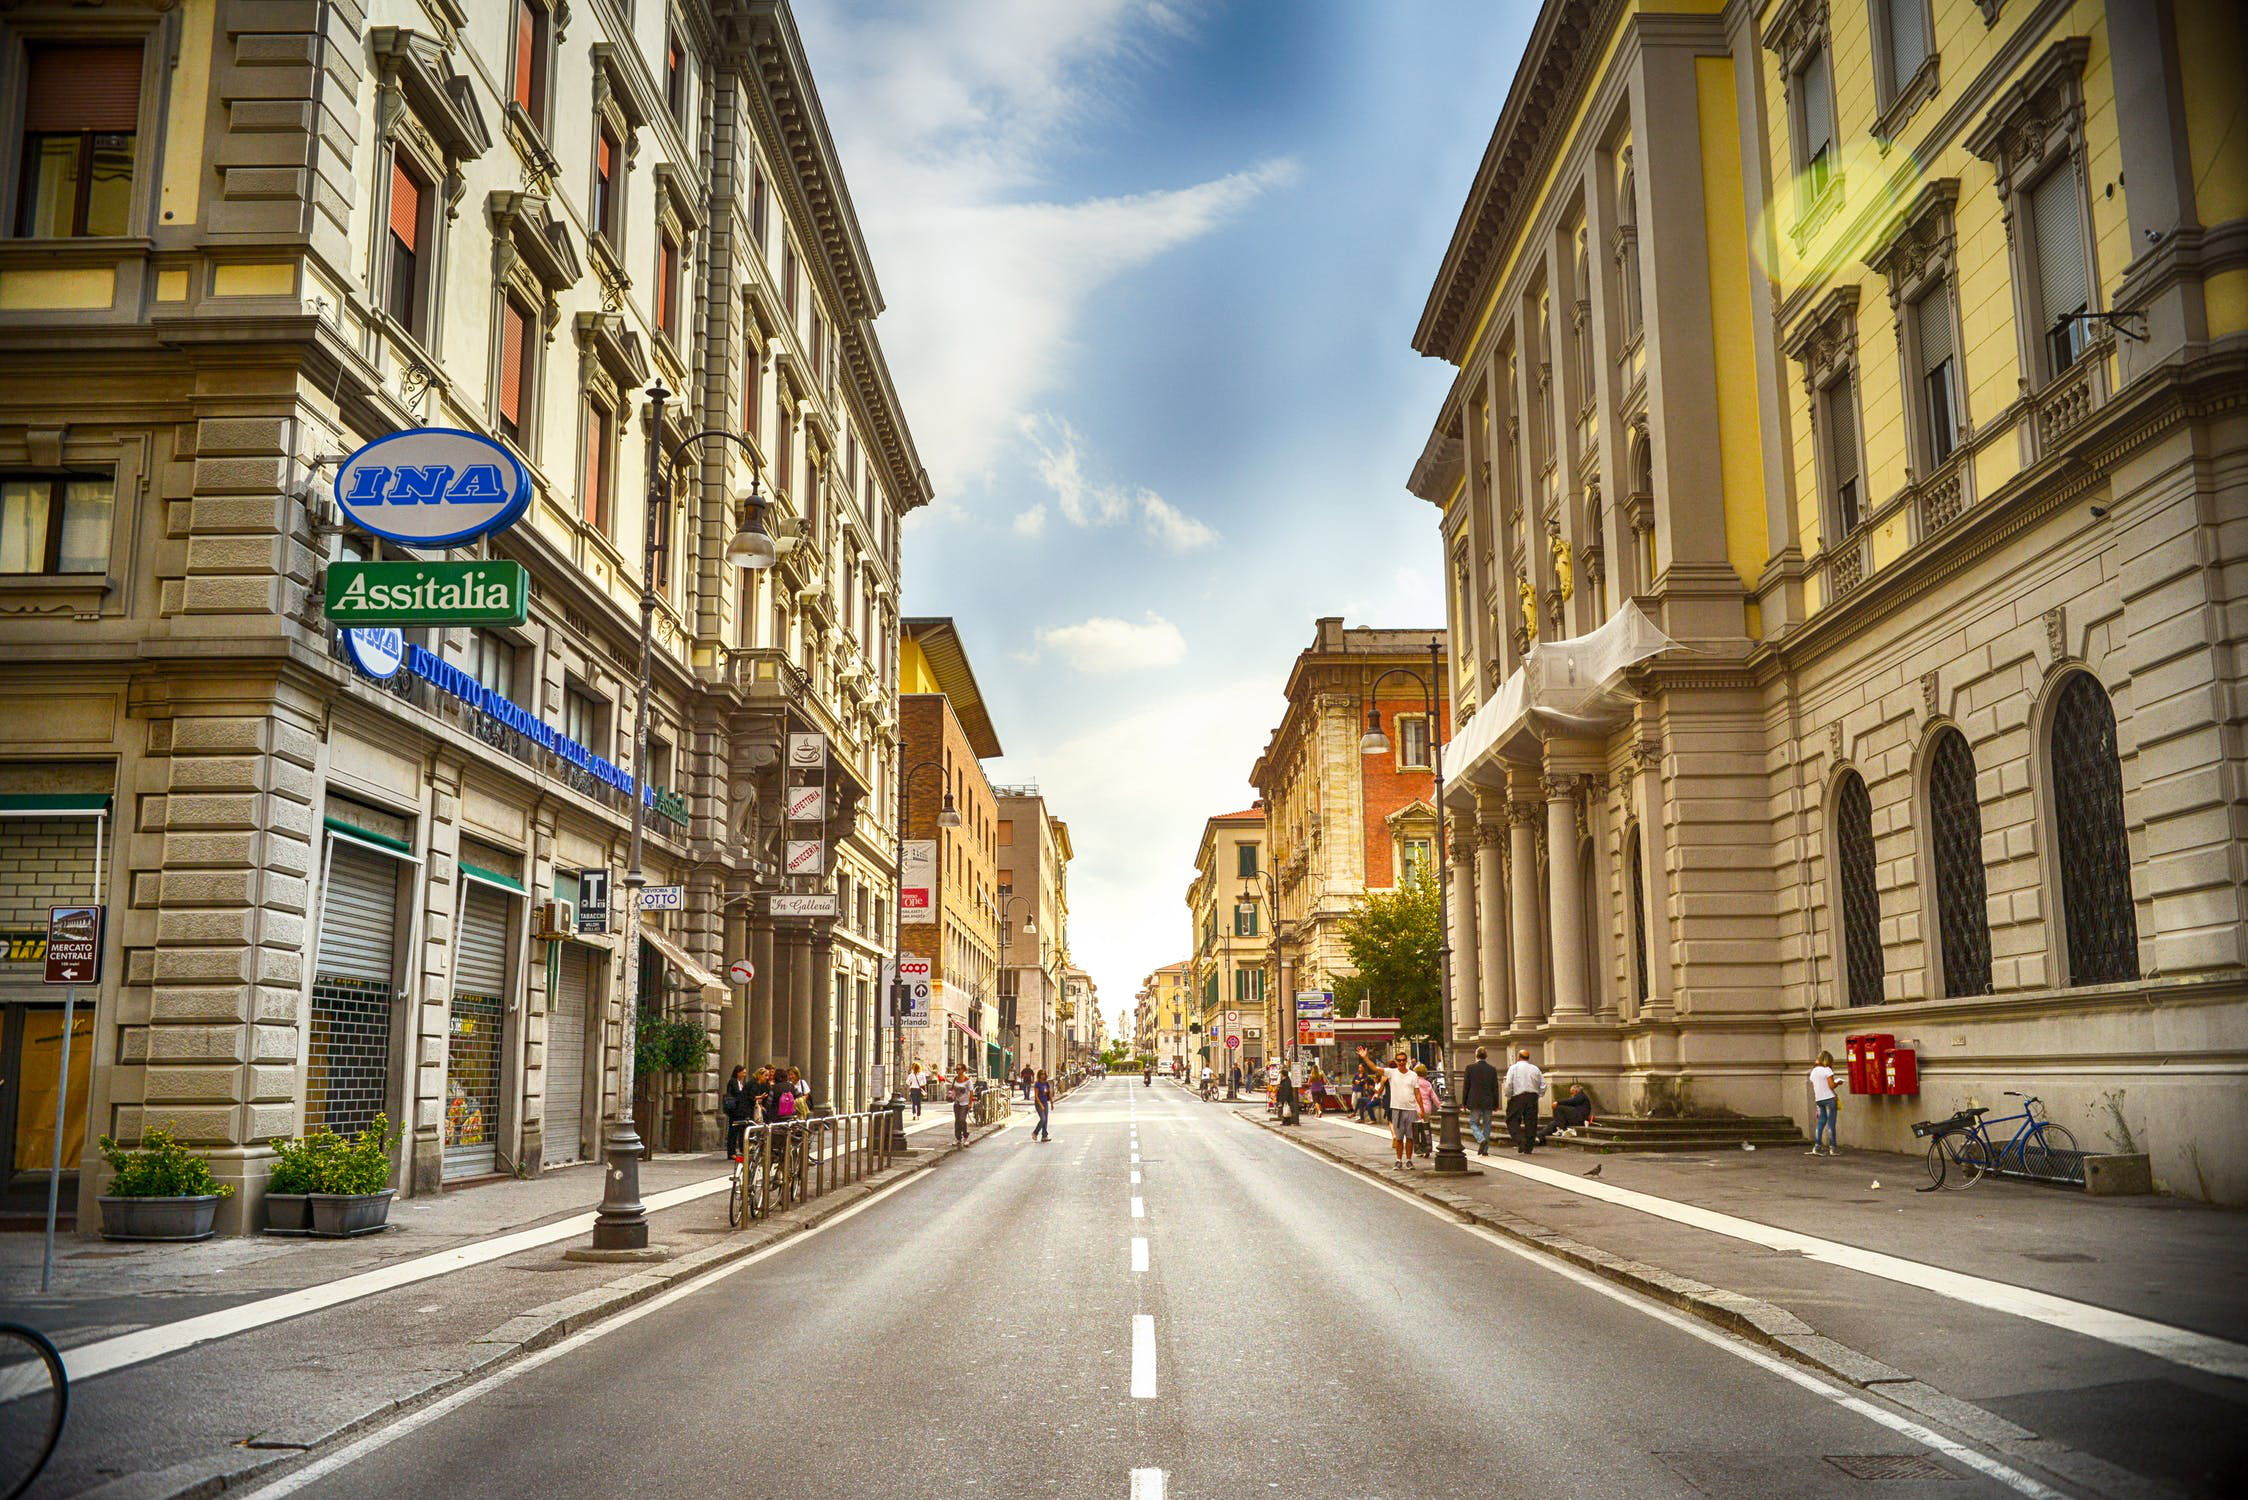

In [13]:
img

### Convert to tensor
* Resize the image and convert to pytorch tensor by applying the transforms

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as tf

In [0]:
transforms = tf.Compose([tf.Resize(400), 
                        tf.ToTensor()])

In [0]:
img_tensor = transforms(img)

In [17]:
img_tensor

tensor([[[0.0549, 0.0667, 0.0706,  ..., 0.0667, 0.0549, 0.0510],
         [0.0353, 0.0431, 0.0588,  ..., 0.0706, 0.0588, 0.0549],
         [0.0392, 0.0392, 0.0510,  ..., 0.0824, 0.0667, 0.0588],
         ...,
         [0.1020, 0.1098, 0.1412,  ..., 0.0157, 0.0078, 0.0078],
         [0.1255, 0.1176, 0.0902,  ..., 0.0157, 0.0078, 0.0078],
         [0.1216, 0.0902, 0.0353,  ..., 0.0157, 0.0078, 0.0078]],

        [[0.0235, 0.0314, 0.0392,  ..., 0.0392, 0.0353, 0.0314],
         [0.0078, 0.0196, 0.0353,  ..., 0.0431, 0.0392, 0.0353],
         [0.0157, 0.0196, 0.0314,  ..., 0.0549, 0.0431, 0.0392],
         ...,
         [0.1059, 0.1137, 0.1451,  ..., 0.0000, 0.0000, 0.0000],
         [0.1255, 0.1176, 0.0902,  ..., 0.0000, 0.0000, 0.0000],
         [0.1176, 0.0863, 0.0314,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0118, 0.0157, 0.0157,  ..., 0.0235, 0.0235, 0.0196],
         [0.0078, 0.0118, 0.0235,  ..., 0.0235, 0.0275, 0.0235],
         [0.0078, 0.0039, 0.0118,  ..., 0.0275, 0.0314, 0.

In [18]:
img_tensor.shape

torch.Size([3, 400, 599])

### Defining filter
* Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters.
* Filters for sharpen, line and edge detetcion operations are below.

In [0]:
sharpen_kernel = [[[[0, -1, 0]], 
                   [[-1, 5, -1]], 
                   [[0, -1, 0]]]]

In [0]:
horizontal_line_kernel = [[[[1, 0, -1]],
                           [[0, 0, 0]],
                           [[-1, 0, 1]]]]

In [0]:
vertical_line_kernel = [[[[0, 1, 0]],
                         [[1, -4, 1]],
                         [[0, 1, 0]]]]

In [0]:
edge_detection_kernel = [[[[-1, -1, -1]],
                          [[-1, 8, -1]],
                          [[-1, -1, -1]]]]

In [0]:
conv_filter = torch.Tensor(sharpen_kernel) 

In [24]:
conv_filter.shape

torch.Size([1, 3, 1, 3])

### Applying filter
* torch.nn.functional.conv2d accepts custom filters as opposed to torch.nn.conv2d which uses the default kernel
* F.conv2d requires a 4d tensor as input. Hence, the unsqueeze operation

In [0]:
img_tensor = img_tensor.unsqueeze(0)

In [26]:
img_tensor.shape

torch.Size([1, 3, 400, 599])

In [0]:
conv_tensor = F.conv2d(img_tensor, conv_filter, padding=0)    

In [28]:
conv_tensor.shape

torch.Size([1, 1, 400, 597])

### Displaying result image
* convert the tensor back to 3d and then to a numpy array for display

In [29]:
conv_img = conv_tensor[0, :, :, :]
conv_img.shape

torch.Size([1, 400, 597])

In [30]:
conv_img = conv_img.numpy().squeeze()
conv_img.shape

(400, 597)

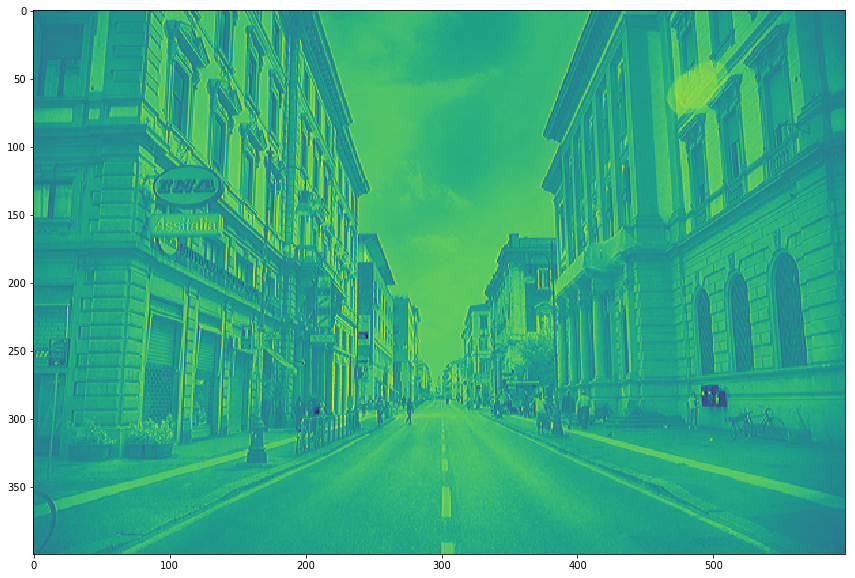

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(conv_img)

In [0]:
pool = nn.MaxPool2d(2, 2)

In [0]:
pool_tensor = pool(conv_tensor)

In [34]:
pool_tensor.shape

torch.Size([1, 1, 200, 298])

In [35]:
pool_img = pool_tensor[0, :, :, :]
pool_img.shape

torch.Size([1, 200, 298])

In [36]:
pool_img = pool_img.numpy().squeeze()
pool_img.shape

(200, 298)

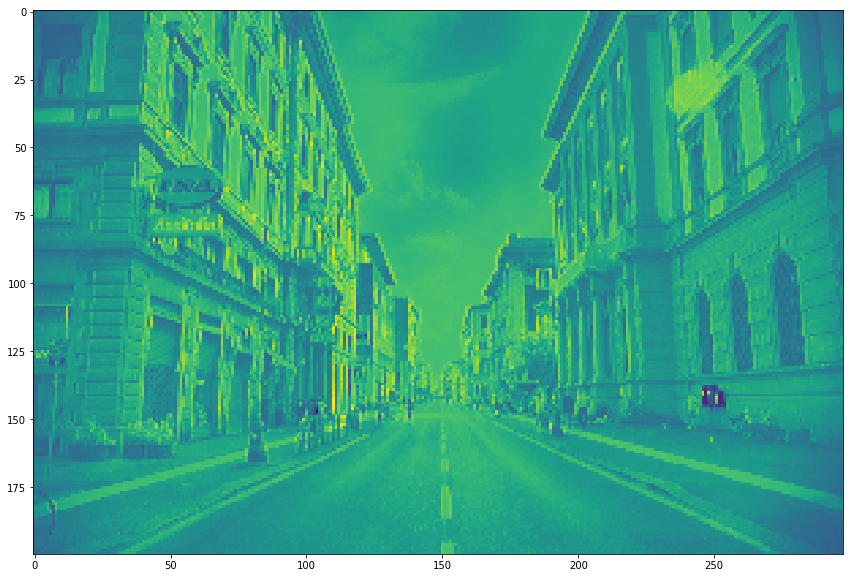

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(pool_img)